# Jacob Liu

## Research question/interests

 My research questions is what are the most commonly used TFT combinations for player whose got rank 1.

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [119]:
rawdata=pd.read_csv("../data/raw/TFT_GrandMaster_MatchData.csv")

In [120]:
rawdata.head()

,gameId,gameDuration,level,lastRound,Ranked,ingameDuration,combination,champion
0,KR_4254769102,2319.661377,9,38,1,2311.472168,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...","{'Malphite': {'items': [], 'star': 2}, 'Blitzc..."
1,KR_4254769102,2319.661377,9,38,2,2311.472168,"{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, '...","{'Fiora': {'items': [], 'star': 2}, 'Leona': {..."
2,KR_4254769102,2319.661377,9,37,3,2247.994873,"{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'S...","{'JarvanIV': {'items': [], 'star': 3}, 'Sona':..."
3,KR_4254769102,2319.661377,7,33,4,1996.358643,"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrat...","{'KhaZix': {'items': [], 'star': 2}, 'KaiSa': ..."
4,KR_4254769102,2319.661377,8,31,5,1871.789551,"{'Chrono': 1, 'Cybernetic': 1, 'DarkStar': 3, ...","{'Leona': {'items': [], 'star': 1}, 'Mordekais..."


## Milestone 3

### Task1: EDA

In [4]:
rawdata.combination.describe()

count                                                 80000
unique                                                26397
top       {'Blaster': 4, 'Chrono': 2, 'Cybernetic': 1, '...
freq                                                   3489
Name: combination, dtype: object

In [5]:
rawdata['combination'][3]

"{'DarkStar': 2, 'Demolitionist': 1, 'Infiltrator': 4, 'MechPilot': 3, 'Set3_Sorcerer': 2, 'Set3_Void': 1, 'Valkyrie': 1}"

In [6]:
rawdata.combination.unique()

array(["{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, 'Mercenary': 1, 'Rebel': 3, 'Set3_Blademaster': 1, 'Set3_Brawler': 4, 'Set3_Void': 1, 'Valkyrie': 2}",
       "{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 6, 'Infiltrator': 1, 'ManaReaver': 2, 'Set3_Blademaster': 3, 'Set3_Brawler': 1, 'Valkyrie': 1, 'Vanguard': 1}",
       "{'DarkStar': 2, 'Protector': 4, 'Rebel': 1, 'Set3_Celestial': 4, 'Set3_Mystic': 4, 'Sniper': 1, 'StarGuardian': 2}",
       ...,
       "{'Chrono': 2, 'Cybernetic': 1, 'DarkStar': 1, 'Infiltrator': 1, 'ManaReaver': 2, 'Set3_Blademaster': 3, 'Set3_Celestial': 2, 'Set3_Mystic': 2, 'SpacePirate': 1, 'Valkyrie': 2, 'Vanguard': 2}",
       "{'Blaster': 2, 'Chrono': 2, 'Demolitionist': 2, 'ManaReaver': 1, 'MechPilot': 1, 'Mercenary': 2, 'Rebel': 1, 'Set3_Brawler': 2, 'Set3_Celestial': 2, 'Set3_Mystic': 1, 'Set3_Void': 1, 'SpacePirate': 1, 'Valkyrie': 1}",
       "{'Blaster': 2, 'Chrono': 2, 'Cybernetic': 3, 'ManaReaver': 2, 'Rebel': 1, 'Set3_Blademaster': 1, 'Set3_Brawler

Average of in game duration is: 1875.54
Median of in game duration is: 1897.79


Text(0.5, 1.0, 'Distribution of Player In Game Duration(s)')

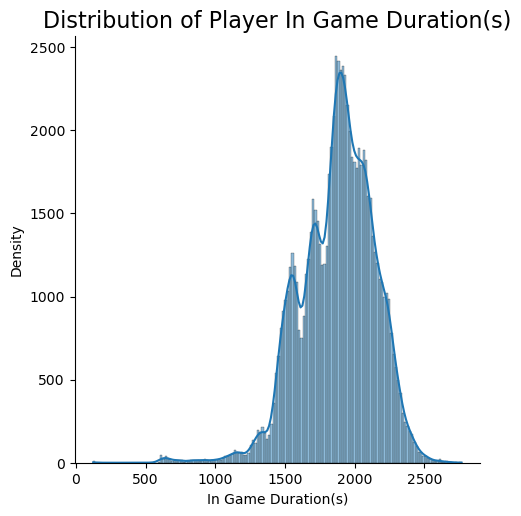

In [123]:
# sns.countplot(data=rawdata,y='combination').set(title='fequency of combinatoin')
plot1=sns.displot(rawdata.ingameDuration,kde=True)
plot1.set_axis_labels('In Game Duration(s)','Density')
median=rawdata.ingameDuration.median()
avg=rawdata.ingameDuration.mean()
print(f'Average of in game duration is: {avg:.2f}')
print(f'Median of in game duration is: {median:.2f}')
plt.title('Distribution of Player In Game Duration(s)',fontsize=16)


The mean is 1875, the median os 1897. Notice that the mean is less than the median and the distribution of this plot is skewed to the left. For data from skewed distributions, the median is better than the mean for measuring central tendency, because it isn't influenced by extremely large values. Most people end the game at 1897 second. 

Average of in game duration is: 2154.34
Median of in game duration is: 2146.10


Text(0.5, 1.0, 'Distribution of Game Duration(s)')

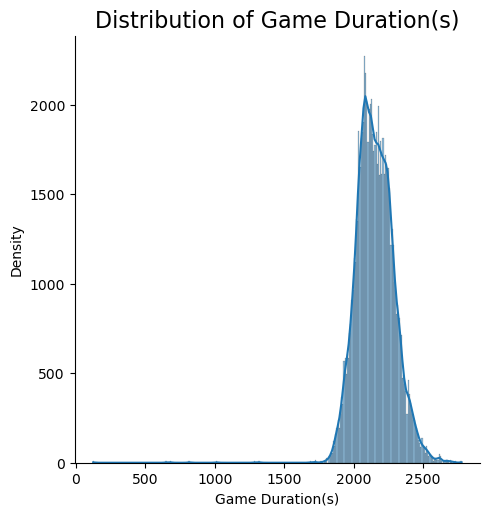

In [122]:
plot2=sns.displot(rawdata.gameDuration,kde=True)
plot2.set_axis_labels('Game Duration(s)','Density')
median=rawdata.gameDuration.median()
avg=rawdata.gameDuration.mean()
print(f'Average of in game duration is: {avg:.2f}')
print(f'Median of in game duration is: {median:.2f}')
plt.title('Distribution of Game Duration(s)',fontsize=16)


The mean is 2154, the median is 2146. Notice that the mean is larger than median. In a perfectly symmetrical distribution, the mean and the median are the same. The median is close to mean, so this histogram displays a symmetrical distibution of data. From the plot we can see that the most of game durations are about 2150 second.

Text(0.5, 1.0, 'Count of Each Level')

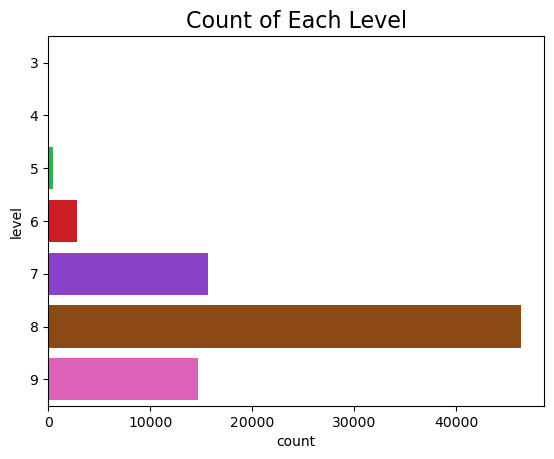

In [124]:
# sns.color_palette('pastel')
# plot3=sns.displot(data=rawdata,x='ingameDuration',hue='level',kind='kde',palette='bright')
plot3=sns.countplot(data=rawdata,y='level',palette='bright')
plt.title('Count of Each Level',fontsize=16)


The plot above show the counts of obervation in each level. Most people end the game when they are at level 8. Rarely people end the game when they are below level 6.

## Task 2: Set up an 'Analysis Pipeline'

In [7]:
data1=rawdata.drop(["gameId","gameDuration","level","lastRound","ingameDuration",'champion'], axis="columns")
data1=data1.drop(data1[data1.Ranked!=1].index)
data1=data1.reset_index()
data1.head()

,index,Ranked,combination
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."


In [8]:
import ast

In [9]:
#convert combination column from str to dict
data1['combination_dict']=data1['combination'].astype('str')
data1['combination_dict']=data1['combination_dict'].apply(lambda x: ast.literal_eval(x))
data1=data1.drop(["combination"], axis="columns")
data1.head()

,index,Ranked,combination_dict
0,0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,8,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,16,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,24,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,32,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."


In [10]:
clist=[]
clist=data1['combination_dict'].apply(lambda x: list(set(x)))
uniqueCombination=[]
for i in clist:
    uniqueCombination=list(set(uniqueCombination+i))
sorted(uniqueCombination)


['Blaster',
 'Chrono',
 'Cybernetic',
 'DarkStar',
 'Demolitionist',
 'Infiltrator',
 'ManaReaver',
 'MechPilot',
 'Mercenary',
 'Protector',
 'Rebel',
 'Set3_Blademaster',
 'Set3_Brawler',
 'Set3_Celestial',
 'Set3_Mystic',
 'Set3_Sorcerer',
 'Set3_Void',
 'Sniper',
 'SpacePirate',
 'StarGuardian',
 'Starship',
 'TemplateTrait',
 'Valkyrie',
 'Vanguard']

In [11]:
clist

0       [Cybernetic, Set3_Brawler, Set3_Blademaster, C...
1       [DarkStar, Set3_Sorcerer, Infiltrator, Set3_Vo...
2       [DarkStar, Set3_Sorcerer, SpacePirate, Infiltr...
3       [Sniper, DarkStar, SpacePirate, Chrono, Set3_C...
4       [SpacePirate, Starship, Set3_Blademaster, Set3...
                              ...                        
9994    [Cybernetic, Set3_Brawler, Infiltrator, Set3_B...
9995    [Cybernetic, Set3_Brawler, Infiltrator, Set3_B...
9996    [Cybernetic, Set3_Brawler, SpacePirate, Starsh...
9997    [Cybernetic, Set3_Brawler, SpacePirate, Set3_B...
9998    [DarkStar, Set3_Sorcerer, Chrono, Set3_Void, R...
Name: combination_dict, Length: 9999, dtype: object

In [14]:
data2=data1
# data2=pd.concat([data1,pd.DataFrame(columns=sorted(uniqueCombination))])
data2[[uniqueCombination]]=None
cols=['Ranked','combination_dict']+sorted(uniqueCombination)
data2=data2[cols]
data2.head()


,Ranked,combination_dict,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...",None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [15]:
for i in range(len(data2.combination_dict)):
    keylist=list(data2.combination_dict[i].keys())
    for k in keylist:
        value=data2.combination_dict[i].get(k)
        data2.at[i,k]=value

In [16]:
fdf=pd.DataFrame(columns=uniqueCombination,index=[0,1,2,3,4,5,6,7,8,9,10])

for col in fdf:
    d=dict(data2[col].value_counts())
    for key,value in d.items():
        fdf.at[key,col]=value
fdf

,Infiltrator,Set3_Mystic,Protector,Valkyrie,DarkStar,TemplateTrait,Mercenary,Demolitionist,Chrono,Vanguard,...,Sniper,Starship,Set3_Sorcerer,Set3_Blademaster,Cybernetic,Set3_Brawler,ManaReaver,SpacePirate,MechPilot,Set3_Celestial
0,24,272,6,44,31,NaN,42,9,NaN,47,...,14,16,41,16,28,259,NaN,21,9,173
1,1372,1414,889,2415,3012,2236,3839,689,1024,2584,...,531,993,364,1275,3918,1257,873,2748,444,846
2,613,2504,1143,2386,1243,NaN,261,1271,5163,1818,...,1912,NaN,1606,135,390,282,3065,870,3,2111
3,25,115,149,15,619,NaN,NaN,79,457,34,...,7,NaN,55,2380,227,46,539,31,1033,262
4,905,225,349,NaN,65,NaN,NaN,1,687,578,...,NaN,NaN,1184,242,19,2244,NaN,99,NaN,1346
5,53,NaN,26,NaN,3,NaN,NaN,NaN,49,2,...,NaN,NaN,85,9,5,NaN,NaN,NaN,NaN,119
6,48,NaN,39,NaN,263,NaN,NaN,NaN,33,NaN,...,NaN,NaN,394,149,745,NaN,NaN,NaN,NaN,164
7,1,NaN,NaN,NaN,85,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5,3,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1,NaN,8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN


## Task 3. Method Chaining and writing Python programs

### Step 1: Build and test your method chain(s)

In [17]:
data2.to_csv('JLiu_processed_data.csv',index=None)

In [18]:
import pandas as pd
import numpy as np
import ast
import operator
from functools import reduce


In [19]:
df=(
    pd.read_csv("../data/raw/TFT_GrandMaster_MatchData.csv")
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration",'champion'], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
    .drop(["combination"], axis="columns")
)

df.head()

,Ranked,combination_dict
0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '..."
1,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat..."
2,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat..."
3,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':..."
4,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'..."


In [20]:
clist=list(np.unique(reduce(operator.add, df.combination_dict.apply(lambda x: list(x.keys())))))
print(clist)

['Blaster', 'Chrono', 'Cybernetic', 'DarkStar', 'Demolitionist', 'Infiltrator', 'ManaReaver', 'MechPilot', 'Mercenary', 'Protector', 'Rebel', 'Set3_Blademaster', 'Set3_Brawler', 'Set3_Celestial', 'Set3_Mystic', 'Set3_Sorcerer', 'Set3_Void', 'Sniper', 'SpacePirate', 'StarGuardian', 'Starship', 'TemplateTrait', 'Valkyrie', 'Vanguard']


In [21]:
df = (
    df.join([ pd.DataFrame(None, index=df.index, columns=sorted(clist) )])
)
for i in range(len(df.combination_dict)):
    keylist=list(df.combination_dict[i].keys())
    for k in clist:
        value=df.combination_dict[i].get(k)
        df.at[i,k]=value
df.head()


,Ranked,combination_dict,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,1,"{'Blaster': 4, 'Chrono': 2, 'Cybernetic': 2, '...",4,2,2,None,None,None,None,None,...,None,None,1,None,None,None,None,None,2,None
1,1,"{'DarkStar': 3, 'Demolitionist': 1, 'Infiltrat...",None,None,None,3,1,4,None,3,...,1,2,1,None,None,None,None,None,1,None
2,1,"{'DarkStar': 1, 'Demolitionist': 3, 'Infiltrat...",None,None,None,1,3,1,None,3,...,None,6,1,None,1,3,None,1,None,None
3,1,"{'Chrono': 1, 'DarkStar': 3, 'Set3_Celestial':...",None,1,None,3,None,None,None,None,...,2,None,None,2,1,1,None,None,None,4
4,1,"{'Blaster': 2, 'Demolitionist': 2, 'Mercenary'...",2,None,None,None,2,None,None,None,...,2,None,None,None,1,None,1,None,2,None


In [22]:
fdf=pd.DataFrame(columns=clist,index=[0,1,2,3,4,5,6,7,8,9,10])
for col in fdf:
    d=dict(df[col].value_counts())
    for key,value in d.items():
        fdf.at[key,col]=value
fdf

,Blaster,Chrono,Cybernetic,DarkStar,Demolitionist,Infiltrator,ManaReaver,MechPilot,Mercenary,Protector,...,Set3_Mystic,Set3_Sorcerer,Set3_Void,Sniper,SpacePirate,StarGuardian,Starship,TemplateTrait,Valkyrie,Vanguard
0,38,NaN,28,31,9,24,NaN,9,42,6,...,272,41,85,14,21,69,16,NaN,44,47
1,1332,1024,3918,3012,689,1372,873,444,3839,889,...,1414,364,3968,531,2748,1236,993,2236,2415,2584
2,1178,5163,390,1243,1271,613,3065,3,261,1143,...,2504,1606,23,1912,870,155,NaN,NaN,2386,1818
3,36,457,227,619,79,25,539,1033,NaN,149,...,115,55,474,7,31,776,NaN,NaN,15,34
4,1844,687,19,65,1,905,NaN,NaN,NaN,349,...,225,1184,NaN,NaN,99,274,NaN,NaN,NaN,578
5,8,49,5,3,NaN,53,NaN,NaN,NaN,26,...,NaN,85,NaN,NaN,NaN,58,NaN,NaN,NaN,2
6,NaN,33,745,263,NaN,48,NaN,NaN,NaN,39,...,NaN,394,NaN,NaN,NaN,602,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,85,NaN,1,NaN,NaN,NaN,NaN,...,NaN,5,NaN,NaN,NaN,53,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,1,...,NaN,16,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Step 2: Wrap your method chain(s) in a function

In [5]:
import pandas as pd
import numpy as np
import ast
import operator
from functools import reduce

def load_and_process(url_or_path_to_csv_file):
    #method1 chain: delete unnessesary columns, delete rows that rank not euqal to 1, convert 'combination' column to string list and add it to new list, drop 'combination' column
    df1=(
    pd.read_csv(url_or_path_to_csv_file)
    .drop(["gameId","gameDuration","level","lastRound","ingameDuration",'champion'], axis="columns")
    .loc[lambda x: x['Ranked']==1]
    .reset_index()
    .drop(["index"], axis="columns")
    .assign(combination_dict=lambda df:
            df['combination'].apply(lambda x: ast.literal_eval(x)))
    .drop(["combination"], axis="columns")
    )
    clist=list(np.unique(reduce(operator.add, df1.combination_dict.apply(lambda x: list(x.keys())))))
    
    #method2 chain create empty column for all unique 
    df2=df1.join([ pd.DataFrame(None, index=df1.index, columns=sorted(clist) )])
        

    for i in range(len(df2.combination_dict)):
        keylist=list(df2.combination_dict[i].keys())
        for k in clist:
            value=df2.combination_dict[i].get(k)
            df2.at[i,k]=value
    
    fdf=pd.DataFrame(columns=clist,index=[0,1,2,3,4,5,6,7,8,9,10])
    
    for col in fdf:
        d=dict(df2[col].value_counts())
        for key,value in d.items():
            fdf.at[key,col]=value        
    
    fdf=(fdf.transpose()
        
    )
    return fdf 


In [6]:
finalDataFrame=load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")
finalDataFrame

,0,1,2,3,4,5,6,7,8,9,10
Blaster,38,1332,1178,36,1844,8,NaN,NaN,NaN,NaN,NaN
Chrono,NaN,1024,5163,457,687,49,33,NaN,NaN,NaN,NaN
Cybernetic,28,3918,390,227,19,5,745,NaN,NaN,NaN,NaN
DarkStar,31,3012,1243,619,65,3,263,85,8,6,NaN
Demolitionist,9,689,1271,79,1,NaN,NaN,NaN,NaN,NaN,NaN
Infiltrator,24,1372,613,25,905,53,48,1,NaN,NaN,NaN
ManaReaver,NaN,873,3065,539,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MechPilot,9,444,3,1033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mercenary,42,3839,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protector,6,889,1143,149,349,26,39,NaN,1,NaN,NaN


### Step 3: Move your function into a new .py file

In [1]:
import project_functions2

In [21]:
final_df = project_functions2.load_and_process("../data/raw/TFT_GrandMaster_MatchData.csv")
final_df

,0,1,2,3,4,5,6,7,8,9
Blaster,38,1332,1178,36,1844,8,NaN,NaN,NaN,NaN
Chrono,NaN,1024,5163,457,687,49,33,NaN,NaN,NaN
Cybernetic,28,3918,390,227,19,5,745,NaN,NaN,NaN
DarkStar,31,3012,1243,619,65,3,263,85,8,6
Demolitionist,9,689,1271,79,1,NaN,NaN,NaN,NaN,NaN
Infiltrator,24,1372,613,25,905,53,48,1,NaN,NaN
ManaReaver,NaN,873,3065,539,NaN,NaN,NaN,NaN,NaN,NaN
MechPilot,9,444,3,1033,NaN,NaN,NaN,NaN,NaN,NaN
Mercenary,42,3839,261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Protector,6,889,1143,149,349,26,39,NaN,1,NaN


In [3]:
final_df.to_csv('JLiu_ProcessedData.csv')

## Task 4. Conduct your analysis to help answer your research question(s)

Text(0.5, 1.0, 'Total usage')

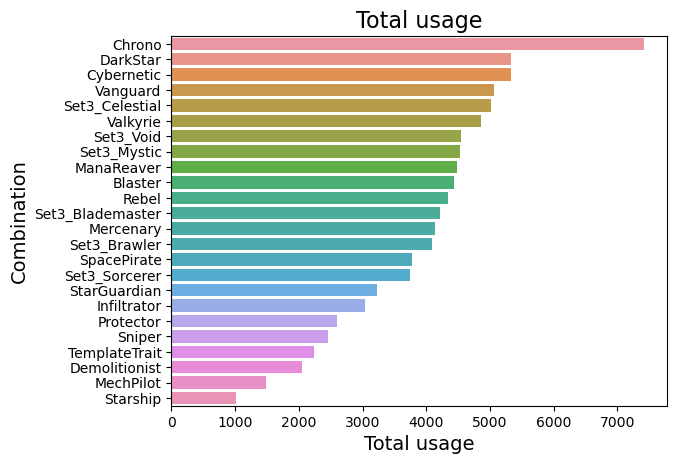

In [61]:
# create a dataframe with sum of all level
df2=pd.DataFrame()
df2['sum']=final_df.sum(axis=1)
df2.reset_index(inplace=True)
df2.rename(columns={'index':'combination'},inplace=True)
df2=df2.sort_values('sum',ascending=False)
sns.barplot(data=df2, x="sum", y="combination")
plt.ylabel('Combination',fontsize=14)
plt.xlabel('Total usage',fontsize=14)
plt.title('Total usage',fontsize=16)


To summarize the overall usage of all combinations I add up all levels of usage for each combination. Now, we can clearly observe that in general "Chrono" is the most popular combination and it is still significantly different from the next popular combination. Also, the 'DarkStar' and 'Cybernetic' are the second and third most commonly used combination in general. However, 'Chrono' may be not the most commonly used combination if we also consider the level of combination. Then I gonna make a heatmap to observe the relation between combination usage and combination level. 

In [75]:
# convert my dataset to a pivot table in order to make heatmap
pivot = pd.DataFrame(columns=['Combination','Level','count'])
idx=0
for i in final_df.index: 
    for j in range(0,10):
        df2=pd.DataFrame({'Combination':i, 'Level':j, 'count':final_df[j].get(i)},index=[idx])
        idx+=1
        pivot=pd.concat([pivot, df2])
    

,Combination,Level,count
0,Blaster,0,38
1,Blaster,1,1332
2,Blaster,2,1178
3,Blaster,3,36
4,Blaster,4,1844
5,Blaster,5,8
6,Blaster,6,NaN
7,Blaster,7,NaN
8,Blaster,8,NaN
9,Blaster,9,NaN


Text(0.5, 1.0, 'Combination Usage between 1000 and 5500')

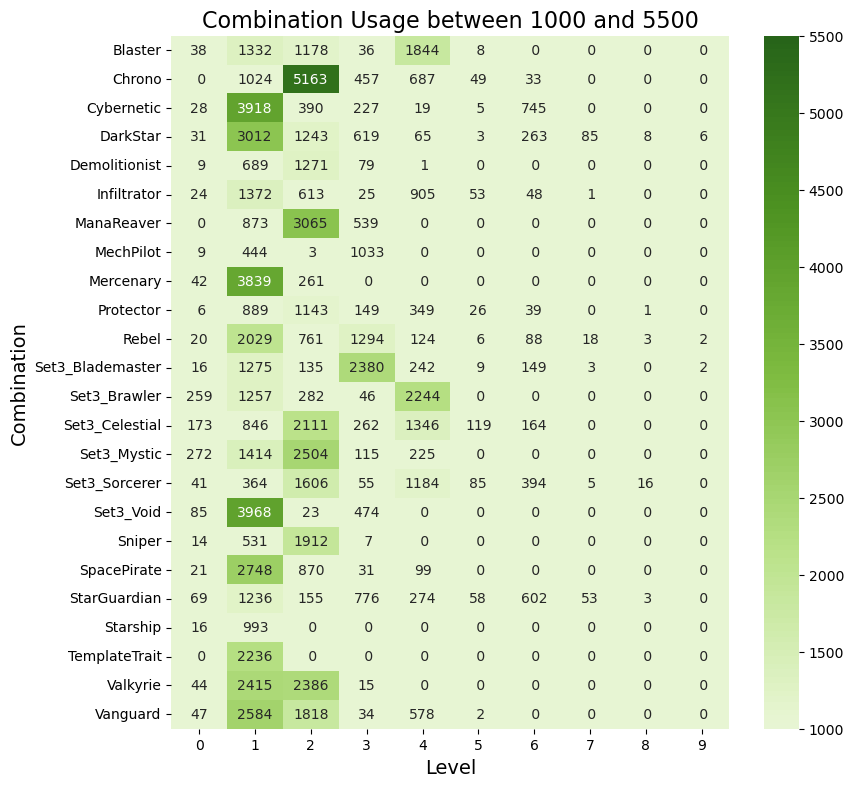

In [146]:
pivot_table= pivot.pivot_table(index="Combination", columns="Level",values='count',fill_value=0)
plt.figure(figsize=(9, 9))
sns.heatmap(pivot_table,annot=True,center=1,vmin=1000,vmax=5500,cmap="PiYG",fmt="2d")

plt.ylabel('Combination',fontsize=14)
plt.xlabel('Level',fontsize=14)
plt.title('Combination Usage between 1000 and 5500',fontsize=16)


The above visualization is a heatmap about differen levels of combination usage during the TFT games. The heatmap above giving obvious visual cues to the reader about how the phenomenon is clustered or varies over space. Through the distinct color distribution, we can see how majority of TFT players select combination with the combination level beween level 1 and level 4 . And most of the players(5163) chose to select level 2 Chrono combination during their games. And second most players chose to select level 1 'Cybernetic'(3918), level 1 'set3_Void'(3968) or level 1 'Mercenary'(3839) in the games.  From this visualization we can only conclude which is the most popular combination between level 1 and level 4, since the value of usage between level 5 and level 9 are significant different from the value of usage between level 1 and level 4. 

Text(0.5, 1.0, 'Combination Usage between 0 and 1000')

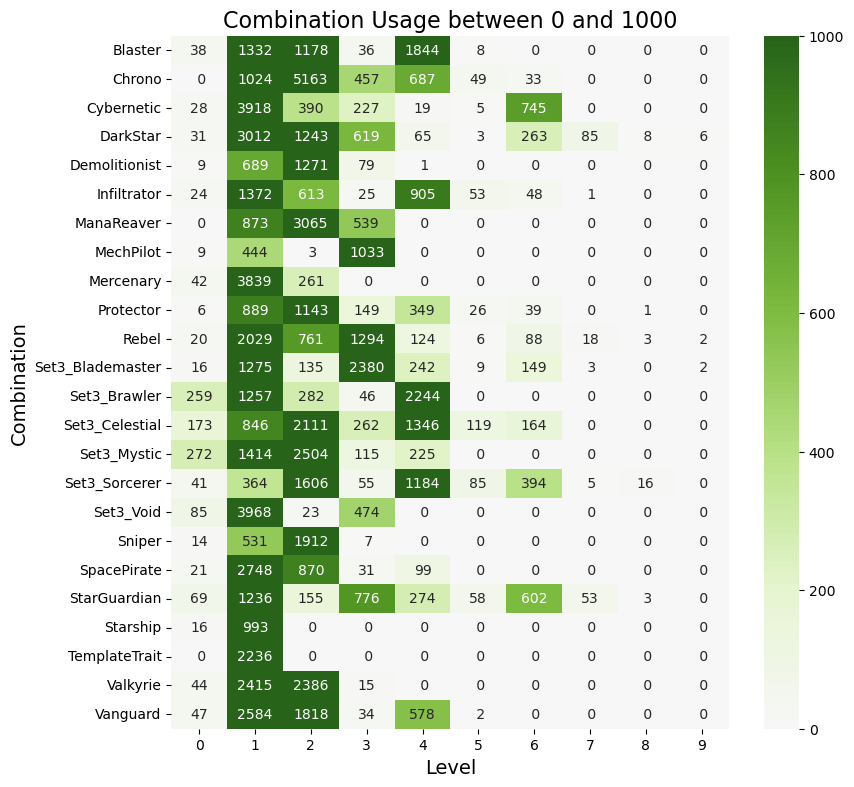

In [147]:
pivot_table= pivot.pivot_table(index="Combination", columns="Level",values='count',fill_value=0)
plt.figure(figsize=(9, 9))
sns.heatmap(pivot_table,annot=True,center=1,cmap='PiYG',vmin=0,vmax=1000,fmt="2d")

plt.ylabel('Combination',fontsize=14)
plt.xlabel('Level',fontsize=14)
plt.title('Combination Usage between 0 and 1000',fontsize=16)


Although most players chose the lower level combination and few used the higher level ones, there were still many players in the game who chose the level 6 'Cybernetic' (745) and level 6 'Star Guardian' (602) combination. The higher the level of the combo, the less players choose. There are only 6 players selected level 9 'Dark Star'